In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import numpy as np 
import sklearn as sk
import seaborn as sns
import statsmodels.api as sm 
import statsmodels.formula.api as smf
import statsmodels.tsa.api as smt
import itertools
import warnings
import scipy.signal as sp

C:\Users\trevo\Anaconda3\lib\site-packages\statsmodels\compat\pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [2]:
#importing zonal data from 2015 to illustrate dominance of Toronto Zone
zone2015 = pd.read_csv("ZonalDemands_2015.csv", parse_dates=["Date"],index_col="Date")


#importing zonal data from 2015-2017, only taking total consumption
demand2013 = pd.read_csv("ZonalDemands_2013.csv", usecols = [0,1,2], parse_dates=["Date"],index_col="Date")
demand2014 = pd.read_csv("ZonalDemands_2014.csv", usecols = [0,1,2], parse_dates=["Date"],index_col="Date")
demand2015 = pd.read_csv("ZonalDemands_2015.csv", usecols = [0,1,2], parse_dates=["Date"],index_col="Date")
demand2016 = pd.read_csv("ZonalDemands_2016.csv", usecols = [0,1,2], parse_dates=["Date"],index_col="Date")
demand2017 = pd.read_csv("ZonalDemands_2017.csv", usecols = [0,1,2], parse_dates=["Date"],index_col="Date")



#merge all demand data
dTot = pd.concat([demand2013,demand2014,demand2015,demand2016,demand2017])
#cleaning and changing to pandas datetime??

#importanting weather data
temperature = pd.read_csv("temperature.csv", usecols = [0,26], parse_dates=["datetime"], index_col="datetime")
#convert to degrees celsius
temperature = temperature - 273.15

#importing humidity data
humidity = pd.read_csv("humidity.csv", usecols = [0,26], parse_dates=["datetime"], index_col="datetime")

In [3]:
temperature.head()

,Toronto
datetime,
2012-10-01 12:00:00,NaN
2012-10-01 13:00:00,13.110000
2012-10-01 14:00:00,13.112541
2012-10-01 15:00:00,13.119518
2012-10-01 16:00:00,13.126496


In [4]:
#inspect data
demand2015.head()

,Hour,Total
Date,,
2015-01-01,1,14960
2015-01-01,2,14476
2015-01-01,3,13979
2015-01-01,4,13670
2015-01-01,5,13567


In [5]:
temperature.head()

,Toronto
datetime,
2012-10-01 12:00:00,NaN
2012-10-01 13:00:00,13.110000
2012-10-01 14:00:00,13.112541
2012-10-01 15:00:00,13.119518
2012-10-01 16:00:00,13.126496


In [6]:
zone2015.head()

,Hour,Total,Northwest,Northeast,Ottawa,East,Toronto,Essa,Bruce,Southwest,Niagara,West,Tot Zones,diff
Date,,,,,,,,,,,,,,
2015-01-01,1,14960,604,1314,1026,935,5317,1040,57,2881,411,1346,14932,-28
2015-01-01,2,14476,597,1282,988,911,5135,995,56,2784,388,1289,14425,-51
2015-01-01,3,13979,592,1280,966,900,4976,957,56,2679,372,1249,14026,47
2015-01-01,4,13670,590,1301,954,903,4851,933,55,2576,358,1221,13741,71
2015-01-01,5,13567,585,1313,954,904,4789,929,57,2543,353,1217,13644,77


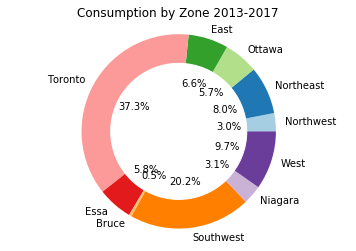

In [7]:
#Pie chart of zones
labels = ['Northwest','Northeast','Ottawa','East','Toronto','Essa','Bruce','Southwest','Niagara','West',]
totals = [zone2015['Northwest'].sum(),zone2015['Northeast'].sum(),zone2015['Ottawa'].sum(),zone2015['East'].sum(),zone2015['Toronto'].sum(),zone2015['Essa'].sum(),zone2015['Bruce'].sum(), zone2015['Southwest'].sum(),zone2015['Niagara'].sum(),zone2015['West'].sum()]

my_circle=plt.Circle( (0,0), 0.7, color='white')
fig,ax1 = plt.subplots()

from palettable.colorbrewer.qualitative import Paired_10

ax1.pie(totals, labels=labels, autopct = '%0.1f%%', pctdistance=.52,colors=Paired_10.hex_colors )
p=plt.gcf()
p.gca().add_artist(my_circle)
ax1.axis('equal')
ax1.set_title('Consumption by Zone 2013-2017')
#ax1.title.set_weight('bold')
plt.show()


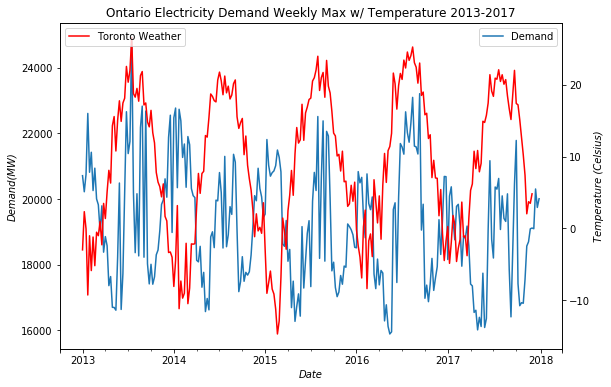

In [13]:

#Yearly Load Profile w/ weather & HUMIDITY
fig, ax1 = plt.subplots(figsize=(9, 6))

#fig3 = plt.figure(figsize=(9, 6))
ax1.set_ylabel('Demand(MW)')
ax1.yaxis.get_label().set_style('italic')
ax1.set_title('Ontario Electricity Demand Weekly Max w/ Temperature 2013-2017')
#ax1.title.set_weight('bold')
#demand2015.Total.resample('W').max().plot(ax = ax1)
#demand2016.Total.resample('W').max().plot(ax = ax1)
#demand2017.Total.resample('W').max().plot(ax = ax1)
dTot.Total.resample('W').max().plot(ax = ax1)

axT = ax1.twinx()
axT.set_ylabel('Temperature (Celsius)')
axT.yaxis.get_label().set_style('italic')

temperature["2013-01-01":"2017-12-31"].Toronto.resample('W').mean().plot(ax = axT, color = 'r')
ax1.legend(["Demand","2016 Demand","2017 Demand","Weather"])
axT.legend(["Toronto Weather"],loc =2)
ax1.set_xlabel('Date')
ax1.xaxis.get_label().set_style('italic')
plt.show()

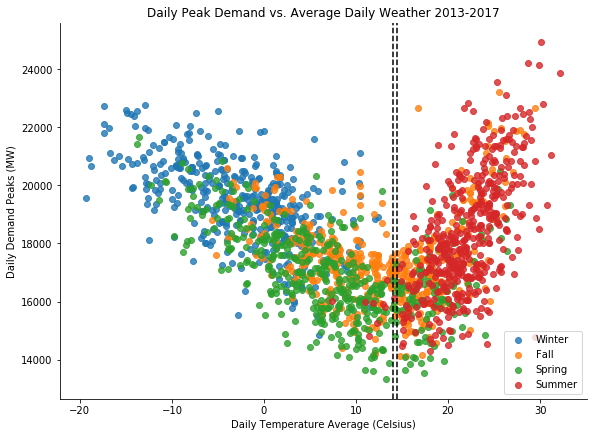

In [16]:
#Scatterplot of weather vs. demand 2013-2017


#ax1.scatter(dTot["2013-01-01":"2017-12-30"].Total.resample('D').mean(),temperature["2013-01-01":"2017-12-30"].Toronto.resample('D').mean())

temperature['Date']=temperature.index
dTot['Date']=dTot.index

#print(temperature)
#print(dTot)

combined = pd.merge(dTot,temperature,left_index=True, right_on = 'Date').resample('D').max()

combined['date']=combined.index
def get_season(row):
    if row['date'].month >= 3 and row['date'].month <= 5:
        return '3'
    elif row['date'].month >= 6 and row['date'].month <= 8:
        return '4'
    elif row['date'].month >= 9 and row['date'].month <= 11:
        return '2'
    else:
        return '1'
    
combined['Season'] = combined.apply(get_season,axis = 1)
#print(combined)

sns.lmplot(size=6,aspect=1.4,x="Toronto", y="Total", data=combined, fit_reg=False, hue='Season', legend=False)                   
plt.legend(["Winter","Fall","Spring","Summer"],loc='lower right')
plt.title('Daily Peak Demand vs. Average Daily Weather 2013-2017')
plt.ylabel('Daily Demand Peaks (MW)')
plt.xlabel('Daily Temperature Average (Celsius)')
plt.axvline(x=14, color = 'black', linestyle ='dashed')
plt.axvline(x=14.5, color = 'black',linestyle ='dashed')
#plt.xticks(np.arange(min(combined.Toronto)-3, max(combined.Toronto)+3, 2))

#ax1.scatter(combined.Toronto,combined.Total)

#combined.set_index('Date')

#print(combined)

Text(0.5,33,'Daily Temperature Average (Celsius)')

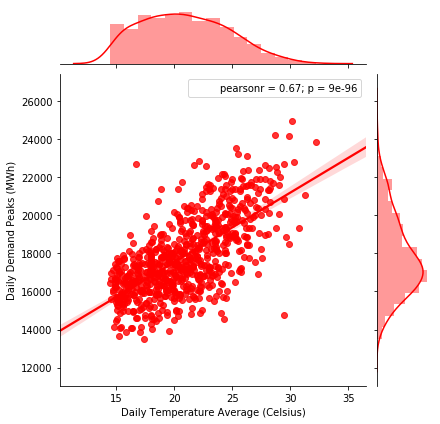

In [10]:
#build summer regression
combined_summer=combined[(combined.Toronto >= 14.5)]

sns.jointplot(x="Toronto", y="Total", data=combined_summer,kind = "reg", color ="red")                   

#plt.title('Daily Peak Demand vs. Average Daily Weather 2013-2017',fontweight="bold",fontsize=25)
plt.ylabel('Daily Demand Peaks (MWh)')
plt.xlabel('Daily Temperature Average (Celsius)')
#plt.xticks(np.arange(min(combined_summer.Toronto)-3, max(combined_summer.Toronto)+3, 2)


Text(0.5,33,'Daily Temperature Average (Celsius)')

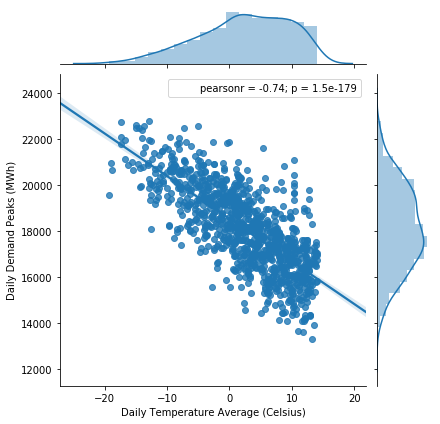

In [11]:
#build winter regression
combined_summer=combined[(combined.Toronto <= 14)]

sns.jointplot(x="Toronto", y="Total", data=combined_summer,kind = "reg")                   

#plt.title('Daily Peak Demand vs. Average Daily Weather 2013-2017',fontweight="bold",fontsize=25)
plt.ylabel('Daily Demand Peaks (MWh)')
plt.xlabel('Daily Temperature Average (Celsius)')
#plt.xticks(np.arange(min(combined_summer.Toronto)-3, max(combined_summer.Toronto)+3, 2)


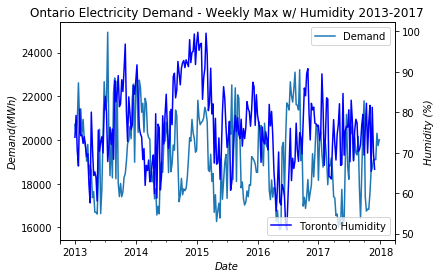

In [12]:
#Yearly Load Profile w/ HUMIDITY
fig, ax1 = plt.subplots()


ax1.set_ylabel('Demand(MWh)')
ax1.yaxis.get_label().set_style('italic')
ax1.set_title('Ontario Electricity Demand - Weekly Max w/ Humidity 2013-2017')
#ax1.title.set_weight('bold')
#demand2015.Total.resample('W').max().plot(ax = ax1)
#demand2016.Total.resample('W').max().plot(ax = ax1)
#demand2017.Total.resample('W').max().plot(ax = ax1)
dTot.Total.resample('W').max().plot(ax = ax1)

axT = ax1.twinx()
axT.set_ylabel('Humidity (%)')
axT.yaxis.get_label().set_style('italic')

humidity["2013-01-01":"2017-12-31"].Toronto.resample('W').mean().plot(ax = axT, color = 'b')
ax1.legend(["Demand","2016 Demand","2017 Demand","Weather"])
axT.legend(["Toronto Humidity"],loc =4)
ax1.set_xlabel('Date')
ax1.xaxis.get_label().set_style('italic')
plt.show()

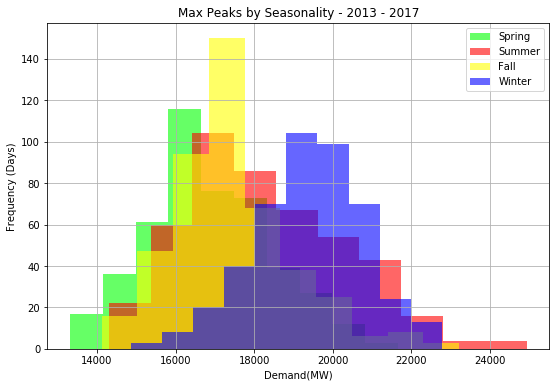

In [10]:
#Spilt Total data by Season
dTot['date']=dTot.index

def get_season(row):
    if row['date'].month >= 3 and row['date'].month <= 5:
        return '1'
    elif row['date'].month >= 6 and row['date'].month <= 8:
        return '2'
    elif row['date'].month >= 9 and row['date'].month <= 11:
        return '3'
    else:
        return '4'
    
dTot['Season'] = dTot.apply(get_season,axis = 1)

#print(dTot[(dTot.Season == '1')])

fig3 = plt.figure(figsize=(9, 6))
ax3 = fig3.add_subplot(111)
ax3.set_xlabel('Demand(MW)')
ax3.set_ylabel('Frequency (Days)') 
ax3.set_title('Max Peaks by Seasonality - 2013 - 2017')
#ax3.title.set_weight('bold')
dTot[(dTot.Season == '1')].Total.resample('D').max().hist(ax=ax3, ls = 'dashed',fc = (0,1,0,0.6))
dTot[(dTot.Season == '2')].Total.resample('D').max().hist(ax=ax3, fc = (1,0,0,0.6))
dTot[(dTot.Season == '3')].Total.resample('D').max().hist(ax=ax3, fc = (1,1,0,0.6))
dTot[(dTot.Season == '4')].Total.resample('D').max().hist(ax=ax3, fc = (0,0,1,0.6))
ax3.legend(["Spring","Summer","Fall","Winter"])



In [14]:
(dTot[(dTot.Season == '4')].Total.resample('D').max()).describe()


count      451.000000
mean     19404.261641
std       1399.589877
min      14855.000000
25%      18531.000000
50%      19444.000000
75%      20332.500000
max      22774.000000
Name: Total, dtype: float64

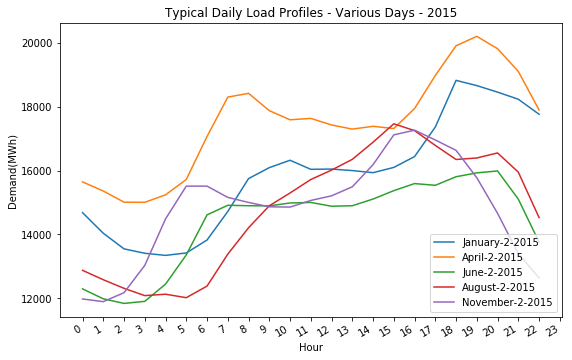

In [17]:
#Daily Load Profile
fig2 = plt.figure(figsize=(9, 6))
ax2 = fig2.add_subplot(111)
ax2.set_xlabel('Hour')
ax2.set_ylabel('Demand(MWh)') 
ax2.set_title('Typical Daily Load Profiles - Various Days - 2015')
#ax2.title.set_weight('bold')
ax2.set_xticks(np.arange(25))
demand2015.Total.iloc[23:46].plot(use_index = False)
demand2015.Total.iloc[1440:1463].plot(use_index = False)
demand2015.Total.iloc[3648:3671].plot(use_index = False)
demand2015.Total.iloc[5112:5135].plot(use_index = False)
demand2015.Total.iloc[7322:7322+23].plot(use_index = False)

ax2.legend(["January-2-2015","April-2-2015","June-2-2015","August-2-2015","November-2-2015"],loc=4)
plt.show()

#seasonality, show average load profile based on summer, winter, spring, fall

In [16]:
demand2015.nlargest(20, columns = 'Total')

,Hour,Total
Date,,
2015-07-28,17,22516
2015-07-29,17,22471
2015-08-17,17,22383
2015-07-28,18,22371
2015-07-29,18,22310
2015-07-29,16,22274
2015-07-29,13,22260
2015-07-28,19,22212
2015-08-17,18,22196


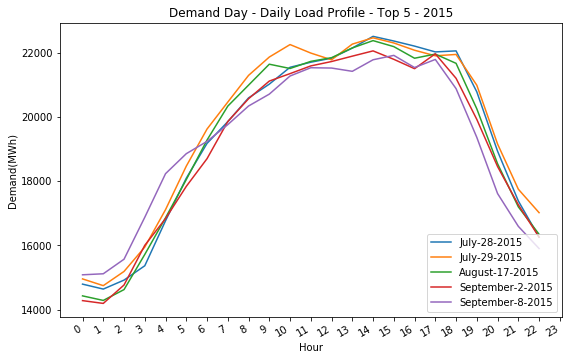

In [18]:
#demand2015.nlargest(10, columns = 'Total')

fig2 = plt.figure(figsize=(9, 6))
ax2 = fig2.add_subplot(111)
ax2.set_xlabel('Hour')
ax2.set_ylabel('Demand(MWh)') 
ax2.set_title('Demand Day - Daily Load Profile - Top 5 - 2015')
#ax2.title.set_weight('bold')
ax2.set_xticks(np.arange(25))
demand2015.Total.iloc[4994:4994+23].plot(use_index = False)
demand2015.Total.iloc[5018:5018+23].plot(use_index = False)
demand2015.Total.iloc[5474:5474+23].plot(use_index = False)
demand2015.Total.iloc[5858:5858+23].plot(use_index = False)
demand2015.Total.iloc[6002:6002+23].plot(use_index = False)
ax2.legend(["July-28-2015","July-29-2015","August-17-2015","September-2-2015","September-8-2015"],loc=4)
plt.show()

(2.75, 5.25)

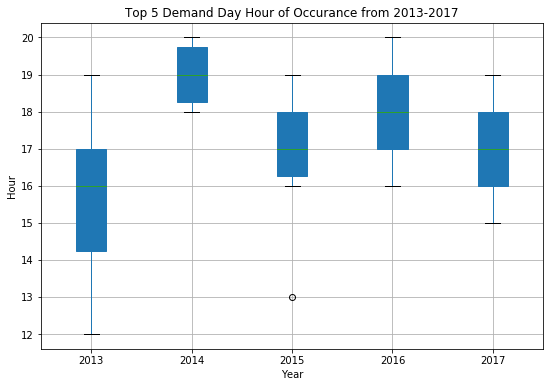

In [11]:
#When do max hour peaks happen? Box plot

fig3 = plt.figure(figsize=(9, 6))
ax3 = fig3.add_subplot(111)
ax3.set_xlabel('Year')
ax3.set_ylabel('Hour') 
ax3.set_title('Top 5 Demand Day Hour of Occurance from 2013-2017')
#ax3.title.set_weight('bold')

demand2013.nlargest(10, columns = 'Total').boxplot(column=['Hour'], positions = [3],showfliers=True, patch_artist = True)
demand2014.nlargest(10, columns = 'Total').boxplot(column=['Hour'], positions = [3.5],showfliers=True, patch_artist = True)
demand2015.nlargest(10, columns = 'Total').boxplot(column=['Hour'], positions = [4],showfliers=True, patch_artist = True)
demand2016.nlargest(10, columns = 'Total').boxplot(column=['Hour'], positions = [4.5],showfliers=True, patch_artist = True)
demand2017.nlargest(10, columns = 'Total').boxplot(column=['Hour'],  positions = [5],showfliers=True, patch_artist = True)
ax3.set_xticklabels(['2013','2014','2015','2016','2017'])
ax3.set_xticks([3,3.5,4,4.5,5])
ax3.set_xlim(2.75,5.25)

Text(0.5,1,'Top 5 Demand Day Hour of Occurance from 2013-2017')

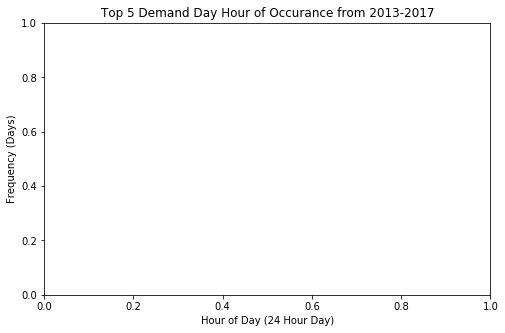

In [19]:
fig3 = plt.figure(figsize = (8,5))
ax3 = fig3.add_subplot(111)
ax3.set_xlabel('Hour of Day (24 Hour Day)')
ax3.set_ylabel('Frequency (Days)') 



#ax3.set_xticks([12,13,14,15,16,17,18,19,20,21,22])
#ax3.set_xlim(11,25)

dTop25 = dTot = pd.concat([demand2013.nlargest(5, columns = 'Total'),demand2014.nlargest(5, columns = 'Total'),demand2015.nlargest(5, columns = 'Total'),demand2016.nlargest(5, columns = 'Total'),demand2017.nlargest(5, columns = 'Total')])

dTop25.hist

ax3.set_title('Top 5 Demand Day Hour of Occurance from 2013-2017')


ValueError: Can only compare identically-labeled Series objects

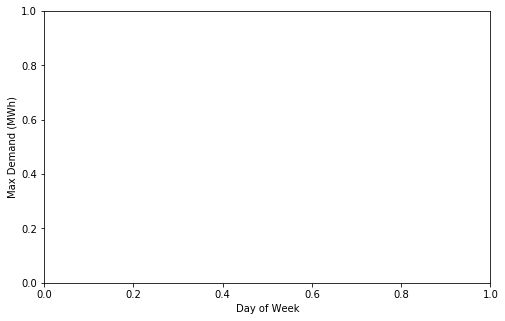

In [20]:
#what day of the week do peaks happen?
import calendar
dTot['Date']=dTot.index
dTot['day_of_week'] = dTot['Date'].apply(lambda x: x.weekday()) # get the weekday index, between 0 and 6
#dTot['day_of_week'] = dTot['day_of_week'].apply(lambda x: calendar.day_name[x])

fig3 = plt.figure(figsize = (8,5))
ax3 = fig3.add_subplot(111)
ax3.set_xlabel('Day of Week')
ax3.set_ylabel('Max Demand (MWh)') 
#ax3.title.set_weight('bold')
#dTot[dTot.resample('W')['Total'].transform(max) == dTot['Total']].boxplot(column=['day_of_week'],showfliers=False, patch_artist = True)
#dTot[dTot.resample('W')['Total'].transform(max) == dTot['Total']].hist(column=['day_of_week'], ax =ax3, bins = 7,rwidth = .9)

ax3.bar(dTot[dTot.resample('W')['Total'].transform(max) == dTot['Total']].day_of_week, dTot[dTot.resample('W')['Total'].transform(max) == dTot['Total']].Total)

ax3.set_title('Max Peak by Day of Week 2013-2017')
#ax3.title.set_weight('bold')
ax3.set_xticklabels(['Sunday','Monday','Tuesday','Wednesday','Thursday','Friday','Saturday'])
ax3.xaxis.get_label().set_style('italic')
ax3.set_xticks([0,1,2,3,4,5,6])
ax3.set_xlim(-1,7)

ValueError: If mode is 'interp', window_length must be less than or equal to the size of x.

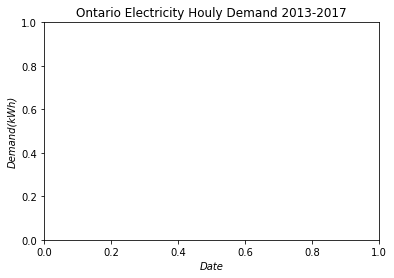

In [21]:
#Yearly Load Profile w/ smoothing

fig, ax1 = plt.subplots()


ax1.set_ylabel('Demand(kWh)')
ax1.yaxis.get_label().set_style('italic')
ax1.set_title('Ontario Electricity Houly Demand 2013-2017')
#ax1.title.set_weight('bold')
ax1.set_xlabel('Date')
ax1.xaxis.get_label().set_style('italic')


#log to transform data to make into small values montonic function, divdde by mean
dTot['Total_smoothed'] = sp.savgol_filter(dTot.Total,901,3)
#print(dTot)
dTot.Total.plot(ax = ax1)
dTot.Total_smoothed.plot(ax = ax1)
ax1.legend(["Original Data","Savitzky Golay Smoothing"])

print(dTot)

In [ ]:
#spilt into train(2013-2016) and test(2017)


In [ ]:
#plot auto correlation and partial correlation 

fig, ax1 = plt.subplots()

#fig1, ax2 = plt.subplots()
lags = 40
smt.graphics.plot_acf(dTot.Total_smoothed,lags=lags,ax=ax1)
smt.graphics.plot_pacf(dTot.Total_smoothed,lags=lags,ax=ax2)

In [ ]:
#Parameter Selection for ARIMA 
p = d = q = range(0, 2)

pdq = list(itertools.product(p, d, q))
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]
print('Examples of parameter combinations for Seasonal ARIMA...')
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[1]))
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[2]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[3]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[4]))

In [ ]:
#Hyperparameter optimization 
warnings.filterwarnings("ignore") # specify to ignore warning messages

for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod = sm.tsa.statespace.SARIMAX(dTot_smooth,
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)

            results = mod.fit()

            print('ARIMA{}x{}12 - AIC:{}'.format(param, param_seasonal, results.aic))
        except:
            continue

In [ ]:
#Fitting ARIMA model
mod = sm.tsa.statespace.SARIMAX(dTot_smooth,
                                order=(1, 1, 1),
                                seasonal_order=(0, 1, 1, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)

results = mod.fit()

print(results.summary().tables[1])

In [ ]:
#Check model assumptions
results.plot_diagnostics(figsize=(15, 12))
plt.show()

In [ ]:
#Validate Forecast
pred = results.get_prediction(start=pd.to_datetime('2017-06-11'), dynamic=False)
pred_ci = pred.conf_int()

ax = dTot_smooth['2015':].plot(label='Actual', figsize=(20, 15))
pred.predicted_mean.plot(ax=ax, label='Static Forecast', alpha=.7)

ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.2)

ax.set_xlabel('Date')
ax.set_ylabel('Demand')
ax.set_title('ARIMA Validation')
plt.legend()

plt.show()

In [ ]:
dTot_forecasted = pred.predicted_mean
dTot_truth = dTot_smooth['2017-06-11':]

#Compute mean square error
mse = ((dTot_forecasted - dTot_truth) ** 2).mean()
print('The Mean Squared Error of our forecasts is {}'.format(round(mse, 2)))

In [ ]:
#future predicitions
# Get forecast 40 steps ahead in future
pred_uc = results.get_forecast(steps=40)

# Get confidence intervals of forecasts
pred_ci = pred_uc.conf_int()

ax = dTot_smooth.plot(label='Actual', figsize=(20, 15))
pred_uc.predicted_mean.plot(ax=ax, label='Forecast')
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.25)
ax.set_xlabel('Date')
ax.set_ylabel('Demand')

plt.legend()
plt.show()